# Statistical Data Analysis on given Dataset

Aim:

- Perform statistical data analysis such as: Estimators of the main statistical measures (mean, variance, standard deviation, covariance correlation, standard error), Main distributions, Hypothesis testing,etc.

- Statistical data analysis is a procedure of performing various statistical operations. It is a kind of quantitative research, which seeks to quantify the data, and typically, applies some form of statistical analysis. Quantitative data basically involves descriptive data, such as survey data and observational data.

- Perform statistical data analysis such as: Estimators of the main statistical measures (mean, variance, standard deviation, covariance correlation, standard error), Main distributions ( Normal distribution, chi-square distribution), Hypothesis testing, pair-wise association (Pearson correlation test, t-test, ANOVA), Non-parametric test (Spearman rank)

# Statistical Analysis

Statistical analysis is done for three reasons:

Descriptive Statistics - What does the data tell us?

Building and Using Models - Can the data be used to estimate values or predict the future?

Hypothesis Testing - Are the descriptive statistics and models just coincidence for this sample?

# Descriptive Analysis

Descriptive Statistics are calculations used to describe or summarize a collection of data. This is, by far, the most common type of statistical analysis that a practicing engineer will ever do

Descriptive Statistics can be grouped into few categories, each seeking to answer a certain question based on the data.

· Amount and Frequency Statistics - How much and how often? sum, count, and percent

· Central Tendency Statistics - What is typical? mean, median, and mode.

· Dispersion Statistics - What is the variation? minimum, maximum, variance, standard deviaion, skew, and quantile (also called percentile).

# Hypothesis Testing

Hypothesis tests are calculation to determine if Descriptive Statistics and Statistical Models are just coincidence for the data sample. For example, suppose we want to know the difference in average height for male and female college students. We can collect a sample of data and compare the mean values. But is the result the true difference or is it just a coincidence of the sample that we happened to observe? In other words, if we were to collect more data might we get a different result? Statisticians have devised a way to calculate the probability of whether the observed descriptive statistic or model is merely a coincidence through hypothesis. The hypothesis calculation is based on the data sample itself, so hypothesis conclusions must be qualified with nuanced words of probability, such as maybe, likely, and probably.

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm, chi2
import matplotlib
%matplotlib inline
import seaborn as sns
matplotlib.style.use('seaborn')
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
drive.mount("MyDrive")
os.chdir("MyDrive")
os.chdir("MyDrive")
os.listdir()

Importing the dataset

In [5]:
df = pd.read_csv('insurance.csv', sep=',', encoding='latin-1')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape

(1338, 7)

The describe() method generates a table containing basic statistical data such as mean, median (50%), standard deviation, etc. For calculating mode, variance, correlation matrix and standard error of the mean, we will have to use the respective functions.

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Checking for other null value attributes

In [9]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Printing number of unique data in each of the features

In [10]:
for col in df:
  space =  ' '*(30-len(col))
  print(col,space,len(df[col].unique()) )

age                             47
sex                             2
bmi                             548
children                        6
smoker                          2
region                          4
charges                         1337


VISUALIZING THE DATA

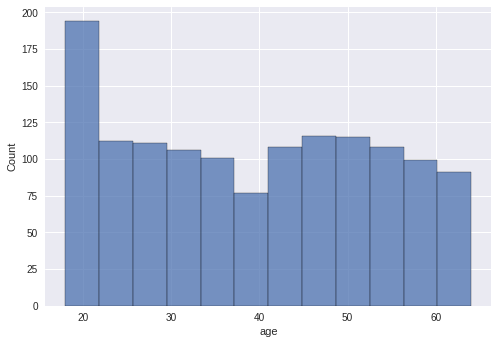

In [11]:
sns.histplot(x='age', data=df, )
plt.show()

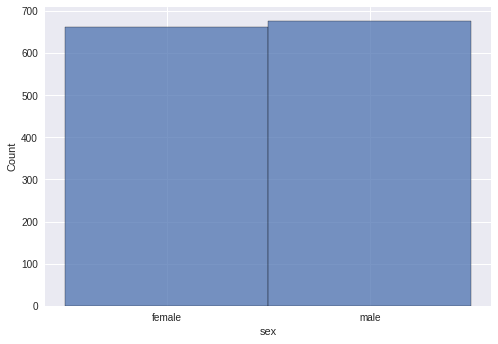

In [12]:
sns.histplot(x='sex', data=df, )
plt.show()

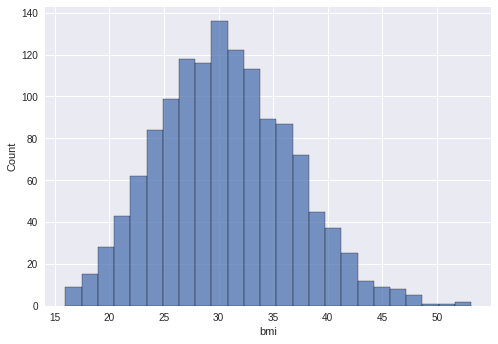

In [13]:
sns.histplot(x='bmi', data=df, )
plt.show()

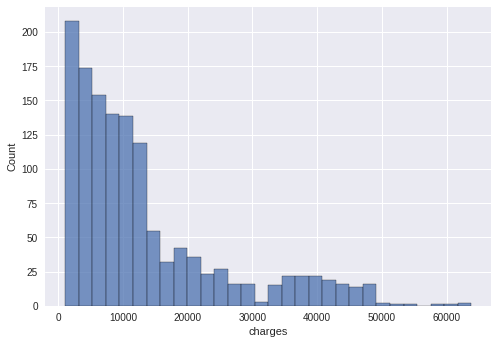

In [14]:
sns.histplot(x='charges', data=df, )
plt.show()

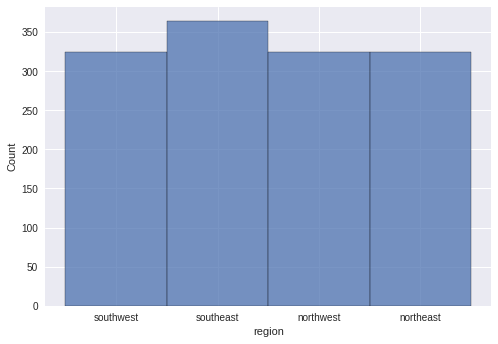

In [15]:
sns.histplot(x='region', data=df, )
plt.show()

# Correlation Matrix

Correlation matrix gives us the relation between 2 attributes.

Correlation closer to 1: implies a strong positive relationship. If one variable grows or shrinks, the other will also grow or shrink in the same direction.

Correlation closer to -1: implies a strong negative relationship. If one variable grows or shrinks, the other will grow or shrink in the opposite direction.

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


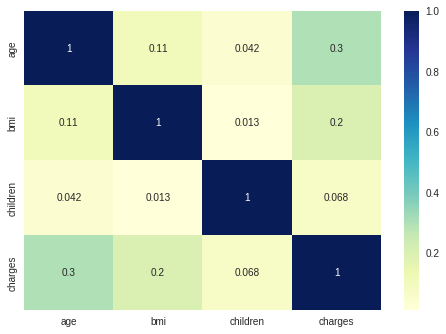

In [16]:
temp_df = df
print(temp_df.corr())
  
# plotting correlation heatmap
dfplot = sns.heatmap(temp_df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

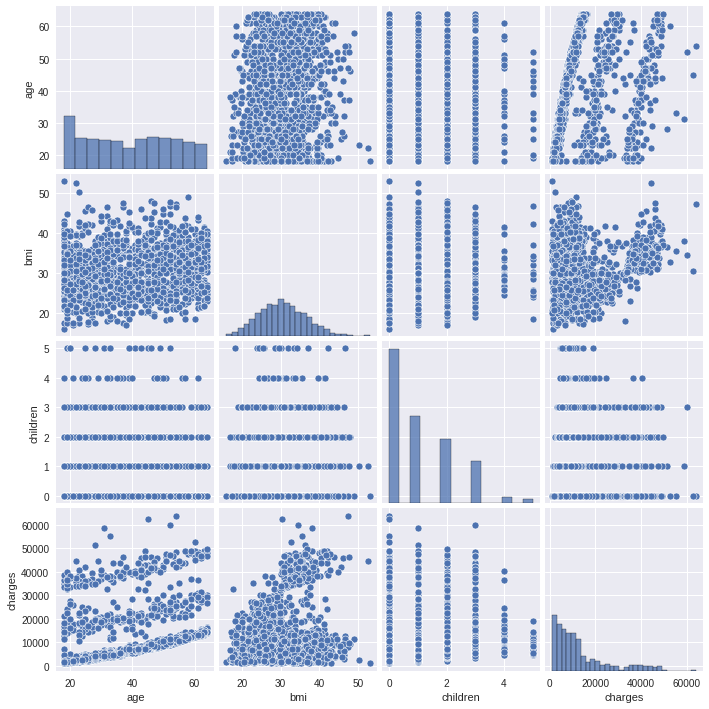

In [17]:
sns.pairplot(df)
plt.show()

In [18]:
print(" df.sem() -> Return unbiased standard error of the mean over requested axis. ")
df.sem()

 df.sem() -> Return unbiased standard error of the mean over requested axis. 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


age           0.384102
bmi           0.166714
children      0.032956
charges     331.067454
dtype: float64

Mode

In [19]:
for i in df:
  print('\n\n',i,'\n', df[i].mode())



 age 
 0    18
dtype: int64


 sex 
 0    male
dtype: object


 bmi 
 0    32.3
dtype: float64


 children 
 0    0
dtype: int64


 smoker 
 0    no
dtype: object


 region 
 0    southeast
dtype: object


 charges 
 0    1639.5631
dtype: float64


Normal distribution of BMI column

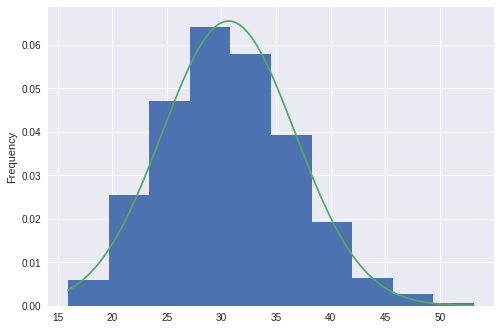

In [20]:
df['bmi'].plot(kind='hist', density=True)
range = np.arange(df['bmi'].min(), df['bmi'].max(), 0.001)
plt.plot(range, norm.pdf(range, df['bmi'].mean(), df['bmi'].std()))

Chi-square distribution of BMI column

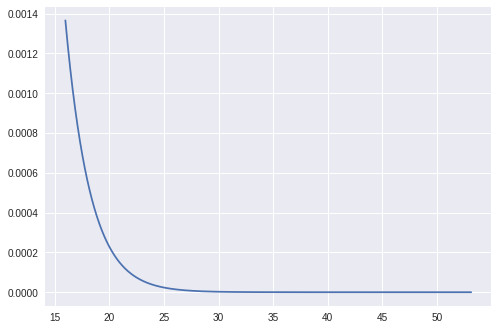

In [21]:
plt.plot(range, chi2.pdf(range, df=4))

# Hypothesis Testing

This hypothesis test will determine whether the mean of runs scored in the first innings of a match is equal to 150 or greater than it.

So, Null hypothesis: u = 150

and Alternate hypothesis: u > 150

In [22]:
df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

Sample of 8 matches

In [23]:
import scipy as sp
# alpha = 0.05
# H0: u = 30
# Ha: u > 30
sample = df['bmi'].sample(10)

print("Sample:\n",sample)
print("\n\ns:",  6.098187)
print("x-bar:", sample.mean())
print("n: 10")

SE =  6.098187/np.sqrt(10)
print("SE: ", SE)

t_stat, p_value = sp.stats.ttest_1samp(a=sample, popmean=30)
print("p-value:", p_value, "\nt-stat", t_stat)
print()

if t_stat > 1.895:
  print("H0 rejected")
else:
  print("H0 failed to reject")


if p_value >0.1:
  print("Non significant evidence against H0")
elif p_value > 0.05 and p_value <= 0.1:
  print("Marginally significant evidence against H0") 
elif p_value > 0.01 and p_value <= 0.05:
  print("Significant evidence against H0") 
else:
  print("Highly significant evidence against H0")

Sample:
 562     30.500
923     35.815
890     26.885
1319    26.315
940     23.210
1259    23.180
747     21.755
1151    36.480
955     39.490
87      27.200
Name: bmi, dtype: float64


s: 6.098187
x-bar: 29.083
n: 10
SE:  1.9284160517629227
p-value: 0.652710393147864 
t-stat -0.46538643622785214

H0 failed to reject
Non significant evidence against H0


Here, I am performing the hypothesis test using z-score and p-value If Zstat > Zalpha, H0 gets rejected else accepted. Also, if p-value is less than alpha then H0 is rejected else accepted.

# Conclusion

Dataset: https://www.kaggle.com/datasets/mirichoi0218/insurance

Descriptive Statistical Analysis provides insights of data which can be easily understood by analyst. It provides the information such that a distinct pattern may arise out of that. It gives conclusion of distribution of our data, helps in detection of outliers, mean, median and mode. It also enables us to identify the relation between different attributes of our data.

In this example, standard deviation was not given also the sample size was 10 << 30. Hence, I chose to go for t-test to test my hypothesis. If t-stat > t-alpha, mean lies in rejection region (right-tailed test). Hence H0 is rejected. I also observed that, lesser the p-value more are the chances of rejecting the null hypothesis. Using this test, I can prove my null hypothesis to be true or false.